In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import pymc3 as pm
import math
plt.rcParams['figure.figsize'] = [16, 8]
plt.style.use("ggplot")

In [35]:
df = pd.read_csv("Cryotherapy.CSV", sep="\t")

In [36]:
df.head(20)

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0
5,1,41,8.00,2,2,20,1
6,1,36,11.00,2,1,8,0
7,1,59,3.50,3,3,20,0
8,1,20,4.50,12,1,6,1
9,2,34,11.25,3,3,150,0


In [37]:
df_train = df.iloc[1:60] #train set(75%)

In [38]:
df_test = df.iloc[60:90] #test set (25%)

In [39]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('Result_of_Treatment ~ sex + age + Time + Number_of_Warts + Area + Type',
                            df_train,
                            family=pm.glm.families.Binomial())
    trace = pm.sample(10000, tune=1000, cores = 6, init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [Type, Area, Number_of_Warts, Time, age, sex, Intercept]
Sampling 6 chains: 100%|██████████| 66000/66000 [03:10<00:00, 345.94draws/s]
The acceptance probability does not match the target. It is 0.882162511595205, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8989626724426402, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


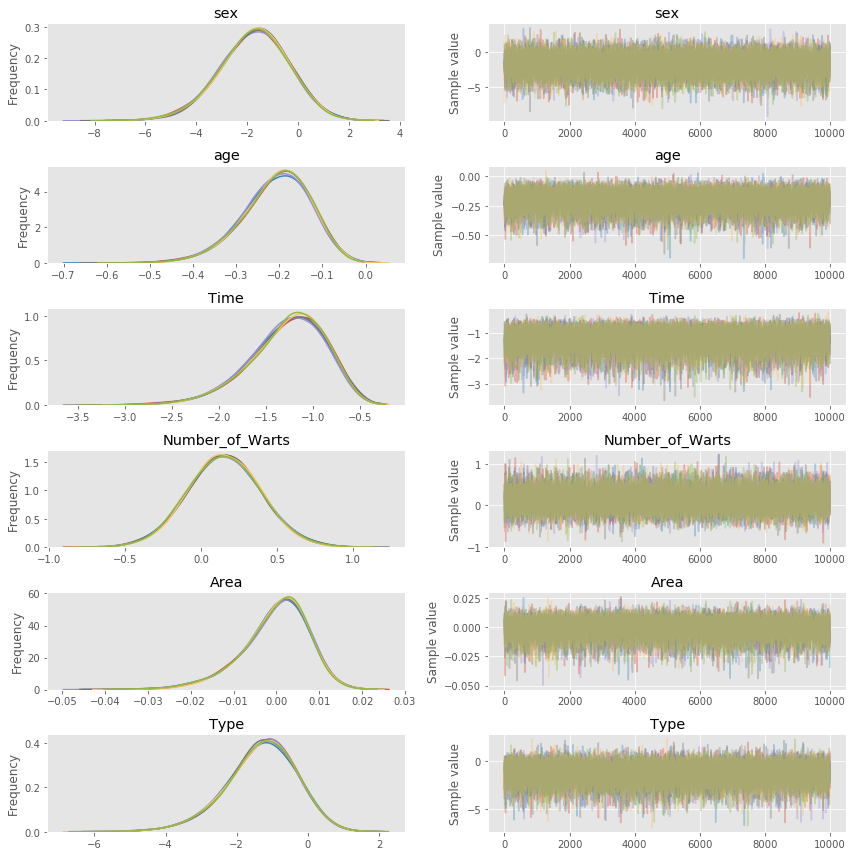

In [40]:
pm.traceplot(trace, varnames=['sex', 'age' , 'Time' , 'Number_of_Warts' , 'Area' , 'Type']);

In [41]:
df_trace = pm.trace_to_dataframe(trace[10000//2:])

sex, age, Time, Number_of_Warts, Area, Type , intercept = df_trace[['sex','age', 'Time', 'Number_of_Warts', 'Area','Type','Intercept' ]].mean(0)

In [42]:
sex, age, Time

(-1.7281235566657729, -0.20751131455306765, -1.2777143939949491)

In [43]:
def predict(s, a, T, N, A, t, intercept=intercept, sex = sex, age=age, Time=Time, Number_of_Warts=Number_of_Warts, Area=Area, Type=Type):
 
    v = intercept + sex*s+age*a+ Time*T+ Number_of_Warts*N+ Area*A +Type*t
    return np.exp(v)/(1+np.exp(v))

In [44]:
df_predict = predict(df_test['sex'],df_test['age'], df_test['Time'],df_test['Number_of_Warts'],df_test['Area'],df_test['Type'])

In [45]:
df_predict = round(df_predict)

In [46]:
df_predict

60    1.0
61    0.0
62    0.0
63    0.0
64    0.0
65    0.0
66    0.0
67    0.0
68    1.0
69    0.0
70    0.0
71    1.0
72    1.0
73    1.0
74    1.0
75    1.0
76    0.0
77    0.0
78    1.0
79    1.0
80    1.0
81    0.0
82    1.0
83    0.0
84    1.0
85    0.0
86    1.0
87    0.0
88    1.0
89    1.0
dtype: float64

In [47]:
confusion_matrix(df_test['Result_of_Treatment'], df_predict)

array([[13,  1],
       [ 2, 14]])

In [48]:
accuracy_score(df_test['Result_of_Treatment'], df_predict)

0.9

In [49]:
f1_score(df_test['Result_of_Treatment'], df_predict)

0.9032258064516129